### 6.5 Unsupervised Machine Leraning: Clustering

##### 01. Importing Libraries, Data and Data Cleaning

##### 02. Elbow Technique

##### 03. K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#create a path
path = r'C:\Users\Lumex\Documents\Achievement_6_Project\Chocolate Bar Rating'
df_choco = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavors_of_cacao_cleaned.csv'))

In [4]:
# drop column 'unnamed' 
df_choco.drop(columns = ['Unnamed: 0'], inplace = True)
#Deal with missing Data
#remove NaN values and convert to int
df_choco['cocoa_percent'] = df_choco['cocoa_percent'].fillna(0).astype(int)
df_choco['bean_type'] = df_choco['bean_type'].str.strip() #remove the empty space in the bean_type
df_choco['bean_type'] = df_choco['bean_type'].replace('', 'Missing') #replace the empty cell with the 'Missing'

In [5]:
df_choco.head(5)

,Company (Maker-if known),name_of_city_for_beanorigin,REF,review_year,cocoa_percent,company_location,Rating,bean_type,country_of_bean_origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,Missing,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,Missing,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,Missing,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,Missing,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,Missing,Peru


In [6]:
#Create a subset of the data including only numerical values
df_choco_num = df_choco.select_dtypes(include=['number'])

#Print the head to ensure it worked
df_choco_num.head()

,REF,review_year,cocoa_percent,Rating
0,1876,2016,63,3.75
1,1676,2015,70,2.75
2,1676,2015,70,3.00
3,1680,2015,70,3.50
4,1704,2015,70,3.50


#### The Elbow Technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
#Find k-means score for each number in the defined range
score = [kmeans[i].fit(df_choco_num).score(df_choco_num) for i in range(len(kmeans))] 

#Check to see scores
score

[-548483414.2401812,
 -140233880.0946091,
 -63068384.99865324,
 -35078932.20716222,
 -22381274.963674534,
 -15846071.126881385,
 -11858226.752226677,
 -8920507.095971528,
 -7524059.864845794]

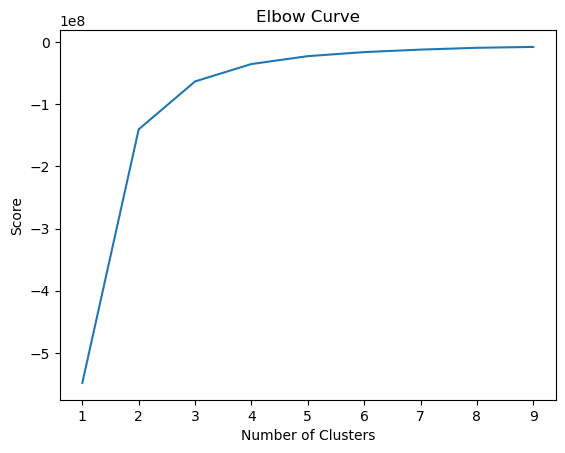

In [9]:
#Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Make informed decision about how many cluster to use: Based on my elbow curve plot, there is a significant curve from 2 to 3 on the x-axis. although there is also a slight curve between 3 and 4. I chose to use cluster of three(3).

##### Run K-means Clustering

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df_choco_num)

KMeans(n_clusters=3)

##### Attach a new column to your dataframe with the resulting clusters.

In [12]:
df_choco_num['clusters'] = kmeans.fit_predict(df_choco_num)

In [13]:
df_choco_num.head()

,REF,review_year,cocoa_percent,Rating,clusters
0,1876,2016,63,3.75,2
1,1676,2015,70,2.75,2
2,1676,2015,70,3.00,2
3,1680,2015,70,3.50,2
4,1704,2015,70,3.50,2


In [14]:
#Check value counts of the clusters
df_choco_num['clusters'].value_counts()

clusters
2    649
0    611
1    535
Name: count, dtype: int64

#### Create different visualization (e.g Scatterplots) using your clustered data.

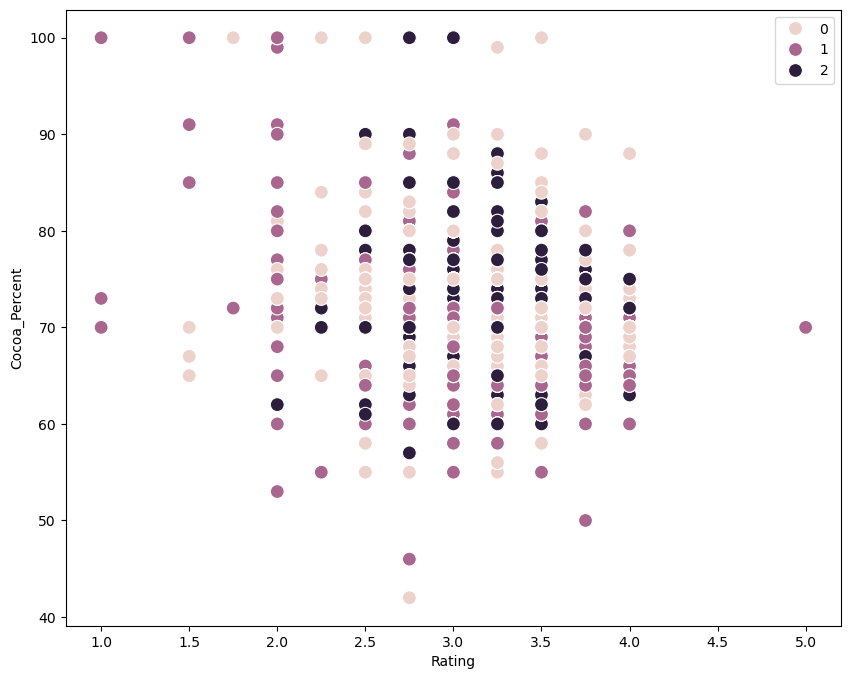

In [15]:
# Plot the clusters for the "Rating" and "Cocoa_percent" variables.

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_choco_num['Rating'], y = df_choco_num['cocoa_percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Cocoa_Percent') # Label y-axis.
plt.show()

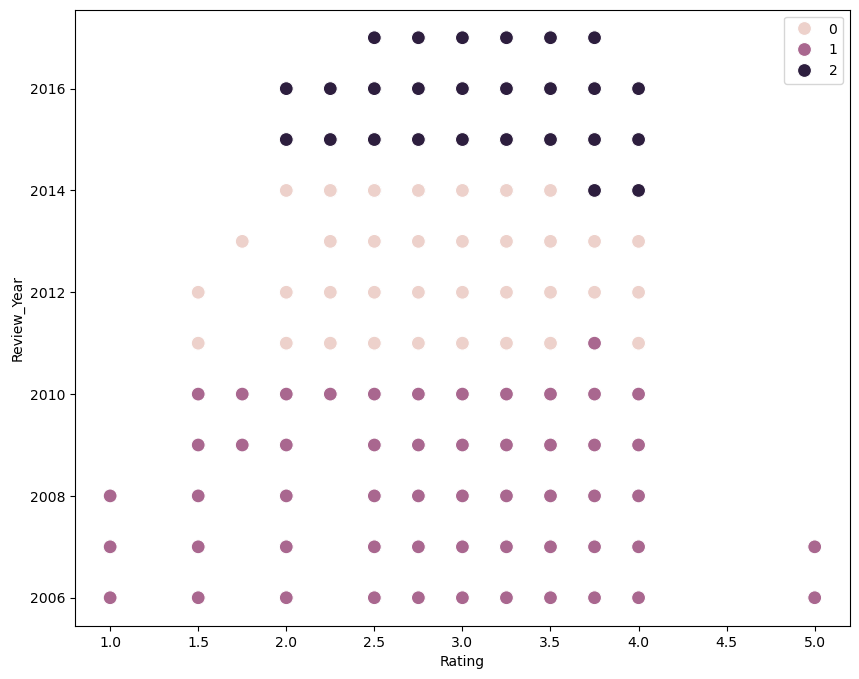

In [16]:
# Plot the clusters for the "Rating" and "review_year" variables.

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_choco_num['Rating'], y = df_choco_num['review_year'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Review_Year') # Label y-axis.
plt.show()

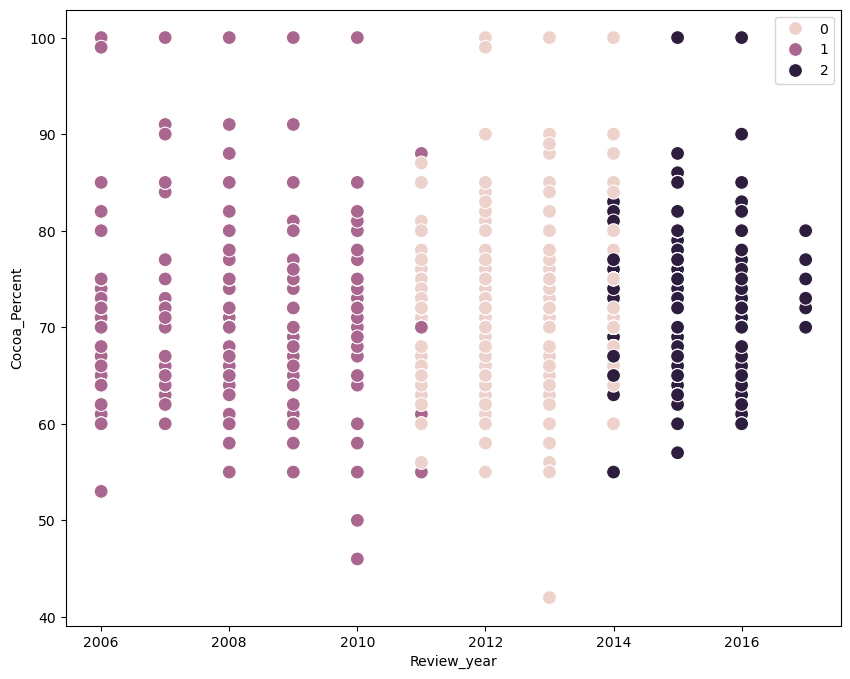

In [17]:
# Plot the clusters for the "Review_year" and "Cocoa_percent" variables.

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_choco_num['review_year'], y = df_choco_num['cocoa_percent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review_year') # Label x-axis.
plt.ylabel('Cocoa_Percent') # Label y-axis.
plt.show()

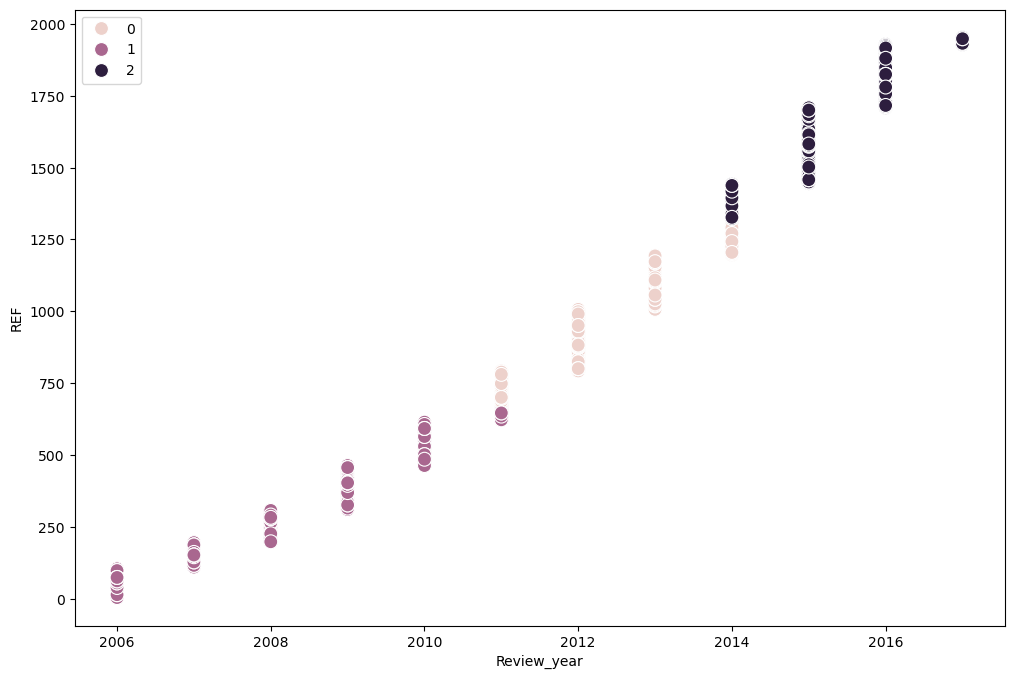

In [18]:
# Plot the clusters for the "Review_year" and "Reference" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_choco_num['review_year'], y = df_choco_num['REF'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review_year') # Label x-axis.
plt.ylabel('REF') # Label y-axis.
plt.show()

##### Discuss how and why your cluster make sense

Some of the scatterplot with the cluster datapoint are not distributed across the plot and some are overlapping which does not make it easy to read or analyse. like the cocoa_percent vs Rating plot, Review_year vs REF, i would say does not make sense for the analyse. The clustering between the other two plots(cocoa_percent vs review_year and Rating vs review_year) are still visible. A scatterplot is cluster based on year at which the chocolate bar has been rated showing us the old rate to the most recent rating. it also shows that there are more chocolate bar that was rated between 2006 - 2010 compared to the other review year.
The scatterplot showing the cocoa_percent vs the review_year gives us insight that most of the chocolate bar contains between 60% - 80% of cocoa in the chocolate bar across the review year which means that percentage was constant all through the years for this dataset.

#### Descriptive statistics for your clusters using the groupby() function.

In [19]:
df_choco_num.loc[df_choco_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_choco_num.loc[df_choco_num['clusters'] == 1, 'cluster'] = 'purple'
df_choco_num.loc[df_choco_num['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df_choco_num.groupby('cluster').agg({'REF':['mean', 'median'], 
                         'review_year':['mean', 'median'], 
                         'cocoa_percent':['mean', 'median'],
                          'Rating':['mean', 'median']})

REF          review_year         cocoa_percent         \
                    mean  median         mean  median          mean median   
cluster                                                                      
dark purple  1632.215716  1626.0  2015.224961  2015.0     71.845917   70.0   
pink         1005.895254  1011.0  2012.540098  2013.0     72.013093   70.0   
purple        346.801869   346.0  2008.562617  2009.0     71.153271   70.0   

               Rating         
                 mean median  
cluster                       
dark purple  3.239599   3.25  
pink         3.184943   3.25  
purple       3.121963   3.00

##### Observation about the above table

Looking the stats table, apart from the REF column that look off for all the cluster, the 

##### Propose what these results could be useful for in future steps of an analytics pipeline.

The result can be useful for the chocolate manufacturers when they like to understand the type of chocolate bar that have been rated high over the year, they check according to how recent the review is and can compare the trend over the years but the limitation will be that the volume of dataset used for this analysis is small. it would have make more sense if it was larger and have more columns that contribute to the attribute of the chocolate bar.
Understanding of the right percent of cocoa that should looks like the right amount to be in the chocolate bar as it seems that is the most prefer by the consumers of the chocolate but this is only based on the ratings of the expert in the chocolate industry and not by the major consumers of the chocolate bar which are the customers. In the future, getting some rating from the customers can also help in revealing more insight for the analysis.

In [21]:
#export the file
#Export the cleaned datafrme for df_prods
df_choco.to_csv(os.path.join(path, '02 Data','Prepared Data', 'flavors_of_cacao_cleaned2.csv'))